<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-ML/blob/main/AA_3_04_RidgeRegressionSt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ridge

- Transform the Boston House dataset using polynomial transformation and split the dataset into test and train datasets
- Run cross validation with Ridge Regression
- Plot the coefficients of the model

In [33]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
import matplotlib.pyplot as plt
import numpy as np

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('boston_house_prices.csv')
data = pd.read_csv(file_path)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [36]:
data.shape

(506, 14)

In [37]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [38]:
X = data.drop(['MEDV'], axis=1)

In [39]:
y = data.MEDV

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [41]:
myT = Pipeline([('scaler', StandardScaler()),
                ('imputer', SimpleImputer()),
                ('poly', PolynomialFeatures(degree=2, include_bias=False)),
                ('ridge', Ridge(alpha=10))])

In [42]:
ridge_model = myT.fit(X_train, y_train)

In [43]:
coefficients = ridge_model.named_steps['ridge'].coef_

In [44]:
zz = ridge_model.named_steps['poly'].fit_transform(X_train)

In [45]:
zz.shape

(379, 104)

In [46]:
X_train.shape

(379, 13)

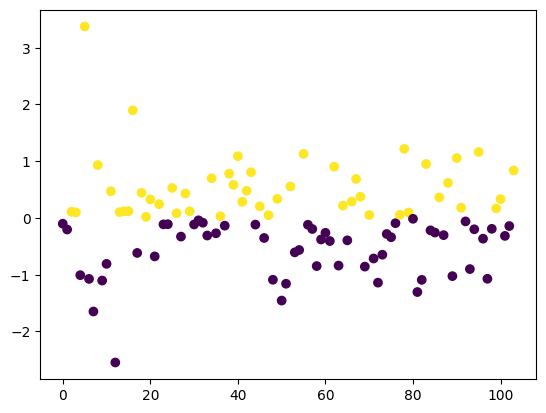

In [47]:
plt.scatter(range(zz.shape[1]), coefficients, c = np.sign(coefficients))

- Start a grid search for `alpha` value
- Plot the model performance versus the different `alpha` values 

In [48]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [49]:
np.linspace(-3,3,13)

array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5,  3. ])

In [54]:
np.logspace(-3,3,13)

array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])

In [55]:
from numpy.core.function_base import logspace
param_grid = {'ridge__alpha':np.logspace(-3,3,13)}

In [56]:
mygrid = GridSearchCV(myT, param_grid, cv=10, return_train_score=True)

In [57]:
mygrid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('imputer', SimpleImputer()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ridge', Ridge(alpha=10))]),
             param_grid={'ridge__alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])},
             return_train_score=True)

In [61]:
mygrid.cv_results_

{'mean_fit_time': array([0.02804282, 0.03959033, 0.02946444, 0.03724914, 0.03158295,
        0.03179798, 0.03471193, 0.03270819, 0.03210146, 0.01449699,
        0.02178359, 0.01600506, 0.01329556]),
 'std_fit_time': array([0.00786604, 0.00225376, 0.0049314 , 0.00411766, 0.00806092,
        0.00832272, 0.00791019, 0.00773736, 0.00571321, 0.00594853,
        0.00274522, 0.00640669, 0.00497813]),
 'mean_score_time': array([0.00777166, 0.00763211, 0.00761526, 0.00378578, 0.00423658,
        0.00515225, 0.00609744, 0.00693853, 0.00845015, 0.00354843,
        0.00380781, 0.00365951, 0.00337334]),
 'std_score_time': array([4.46345179e-03, 4.75392157e-03, 6.16906368e-03, 1.12887763e-04,
        1.38392705e-03, 2.79456619e-03, 3.07108798e-03, 3.77108716e-03,
        5.51337397e-03, 7.41714872e-04, 5.00804232e-04, 9.96415366e-05,
        1.91793212e-04]),
 'param_ridge__alpha': masked_array(data=[0.001, 0.0031622776601683794, 0.01,
                    0.03162277660168379, 0.1, 0.3162277660168379

In [63]:
myresults = pd.DataFrame(mygrid.cv_results_)
myresults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.028043,0.007866,0.007772,0.004463,0.001,{'ridge__alpha': 0.001},0.540199,0.893441,0.785749,0.869312,...,0.953136,0.949065,0.951816,0.949325,0.947953,0.944916,0.947760,0.946359,0.948096,0.002658
1,0.039590,0.002254,0.007632,0.004754,0.003162,{'ridge__alpha': 0.0031622776601683794},0.540426,0.893475,0.785419,0.869519,...,0.953025,0.948876,0.951510,0.949196,0.947800,0.944693,0.947640,0.946273,0.947933,0.002650
2,0.029464,0.004931,0.007615,0.006169,0.01,{'ridge__alpha': 0.01},0.548442,0.893043,0.785908,0.869036,...,0.952746,0.948584,0.951158,0.948934,0.947480,0.944428,0.947453,0.946052,0.947657,0.002641
3,0.037249,0.004118,0.003786,0.000113,0.031623,{'ridge__alpha': 0.03162277660168379},0.568122,0.892734,0.787802,0.868344,...,0.952191,0.948190,0.950816,0.948486,0.946942,0.943996,0.947203,0.945600,0.947223,0.002639
4,0.031583,0.008061,0.004237,0.001384,0.1,{'ridge__alpha': 0.1},0.605151,0.894461,0.790966,0.868214,...,0.951426,0.947731,0.950407,0.947862,0.946267,0.943361,0.946846,0.944902,0.946620,0.002675
5,0.031798,0.008323,0.005152,0.002795,0.316228,{'ridge__alpha': 0.31622776601683794},0.677587,0.900276,0.794098,0.870118,...,0.950279,0.946934,0.949590,0.946716,0.945146,0.942291,0.946046,0.943669,0.945535,0.002790
6,0.034712,0.007910,0.006097,0.003071,1.0,{'ridge__alpha': 1.0},0.785092,0.912021,0.797341,0.875972,...,0.948238,0.945081,0.947835,0.944510,0.942815,0.940348,0.944220,0.941311,0.943377,0.003001
7,0.032708,0.007737,0.006939,0.003771,3.162278,{'ridge__alpha': 3.1622776601683795},0.853304,0.926053,0.800856,0.884504,...,0.944055,0.940547,0.943883,0.940393,0.938288,0.936413,0.940216,0.936855,0.938967,0.003313
8,0.032101,0.005713,0.008450,0.005513,10.0,{'ridge__alpha': 10.0},0.871345,0.932283,0.798128,0.887554,...,0.935498,0.931013,0.935611,0.932202,0.929877,0.928134,0.931919,0.928483,0.930193,0.003769
9,0.014497,0.005949,0.003548,0.000742,31.622777,{'ridge__alpha': 31.622776601683793},0.906228,0.928548,0.780003,0.877151,...,0.920917,0.915377,0.920863,0.917678,0.915010,0.913250,0.917679,0.913949,0.915104,0.004425


In [64]:
myresults.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_ridge__alpha', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

<Axes: xlabel='param_ridge__alpha'>

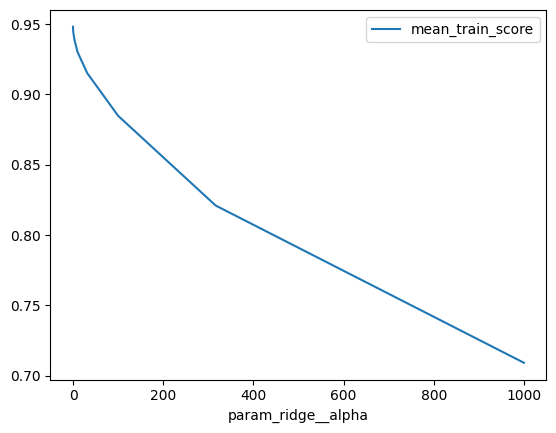

In [68]:
myresults.plot('param_ridge__alpha', 'mean_train_score')

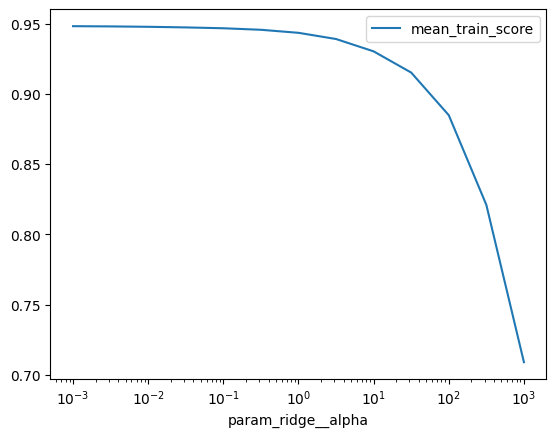

In [69]:
myresults.plot('param_ridge__alpha', 'mean_train_score')
plt.xscale('log')

/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


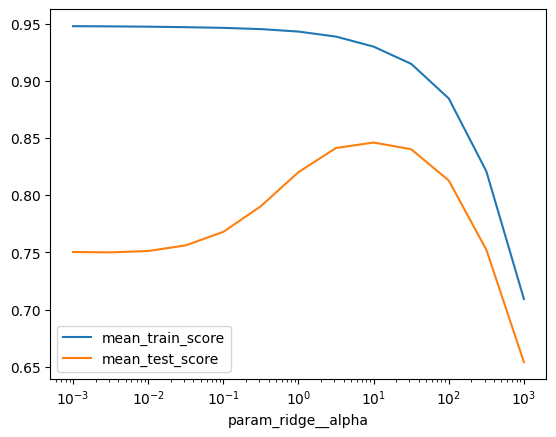

In [71]:
myresults.plot('param_ridge__alpha', 'mean_train_score')
myresults.plot('param_ridge__alpha', 'mean_test_score', ax=plt.gca())
plt.xscale('log')

In [72]:
len(coefficients)

104

- Print the best parameter score
- Print the best model score

In [73]:
mygrid.best_params_, mygrid.best_estimator_

({'ridge__alpha': 10.0},
 Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer()),
                 ('poly', PolynomialFeatures(include_bias=False)),
                 ('ridge', Ridge(alpha=10.0))]))

- Plot the model coefficients

- Plot the model coefficients for alpha=1, 14, and 100

- Create a learning curve for different data train sizes

- Create the learning curve plot for different train size and alpha= 1, 14, and 100

ML Pipeline (Applied ML)-->algorithms (Math, especially Linear Algebra)
1. Decide classification or regression ---> (Linear Regression, Ridge), Logistic Regression (C)
2. Preprocessing (python mostly, but SQL will be helpful)--> imputation, onehotencoding, scaling, PCA, ..
3. hyperparameter tuning --> Crossvalidation, gridsearch, ...
4. testing--> evaluation (precision, recall, f1, confusion matrix, ROc, AUc, R2, MSE, ...)
5. Deployment

numbers
text
image